### 데이터 셋
 - https://archive.ics.uci.edu/dataset/352/online+retail
 - 50 만건 데이터(2010/12 ~ 2011/12)
 - 영국기반 데이터 셋

### 데이터 로드

In [1]:
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np

In [3]:
retail_df = pd.read_excel("./data/Online Retail.xlsx")

### 데이터 탐색

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- InvoiceNo : 주문번호
- StockCode : 상품코드
- Description : 상품상세설명
- Quantity : 주문수량
- InvoiceDate : 주문시각
- UnitPrice : 상품가격
- CustomerID : 고객아이디
- Country : 고객거주지역

In [5]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:

retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 데이터 전처리

In [19]:
# customerID null 인 데이터 제거
# retail_df = retail_df[~retail_df['CustomerID'].isnull()]
retail_df = retail_df[pd.notnull(retail_df['CustomerID'])]
# retail_df['CustomerID'].dropna(inplace=True)

In [13]:
# 수량, 가격 0보다 작은 데이터 제거

retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]

In [21]:
# 데이터 정리 후 행 수 확인
len(retail_df)

397884

In [22]:
# CustomerID 데이터 타입 변경 int32 : astype

# retail_df['CustomerID'].dtype
retail_df['CustomerID'] = retail_df['CustomerID'].astype("int32")
print(retail_df['CustomerID'].dtype)

int32


In [23]:
# CheckoutPrice = Quantity * UnitPrice 

retail_df['CheckoutPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [24]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [29]:
# 정제 데이터 저장

retail_df.to_csv("./data/OnlineRetailClean.csv",index=False)

In [32]:
retail_df = pd.read_csv("./data/OnlineRetailClean.csv",header=None)
retail_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [33]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       397884 non-null  int64  
 1   1       397884 non-null  int64  
 2   2       397884 non-null  object 
 3   3       397884 non-null  object 
 4   4       397884 non-null  int64  
 5   5       397884 non-null  object 
 6   6       397884 non-null  float64
 7   7       397884 non-null  int64  
 8   8       397884 non-null  object 
 9   9       397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [34]:
retail_df.columns = ['0','InvoiceNo','StockCode','Description','Quantity',
                     'InvoiceDate','UnitPrice','CustomerID','Country','CheckoutPrice']

In [35]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   0              397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int64  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  int64  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [37]:
# 0 번 컬럼 삭제

retail_df.drop(columns='0', inplace=True)

In [38]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int64  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [40]:
# InvoiceDate object => datetime

retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [42]:
print(retail_df['InvoiceDate'].dtype)

datetime64[ns]


### 데이터 분석
- 매출액 분석
    - 전체매출
    - 국가별매출
    - 월별매출
    - 일별매출
    - 시간대별매출

In [51]:
# 전체 매출액
# retail_df['CheckoutPrice'] 매출액

total_revenue = retail_df['CheckoutPrice'].sum()
total_revenue

np.float64(8911407.904)

In [46]:
# 국가별 매출액
# groupby

rev_by_contries = retail_df.groupby('Country')['CheckoutPrice'].sum().sort_values().reset_index()
rev_by_contries.head(10)
# retail_df.head()

,Country,CheckoutPrice
0,Saudi Arabia,145.92
1,Bahrain,548.40
2,Czech Republic,826.74
3,RSA,1002.31
4,Brazil,1143.60
5,European Community,1300.25
6,Lithuania,1661.06
7,Lebanon,1693.88
8,United Arab Emirates,1902.28
9,Unspecified,2667.07


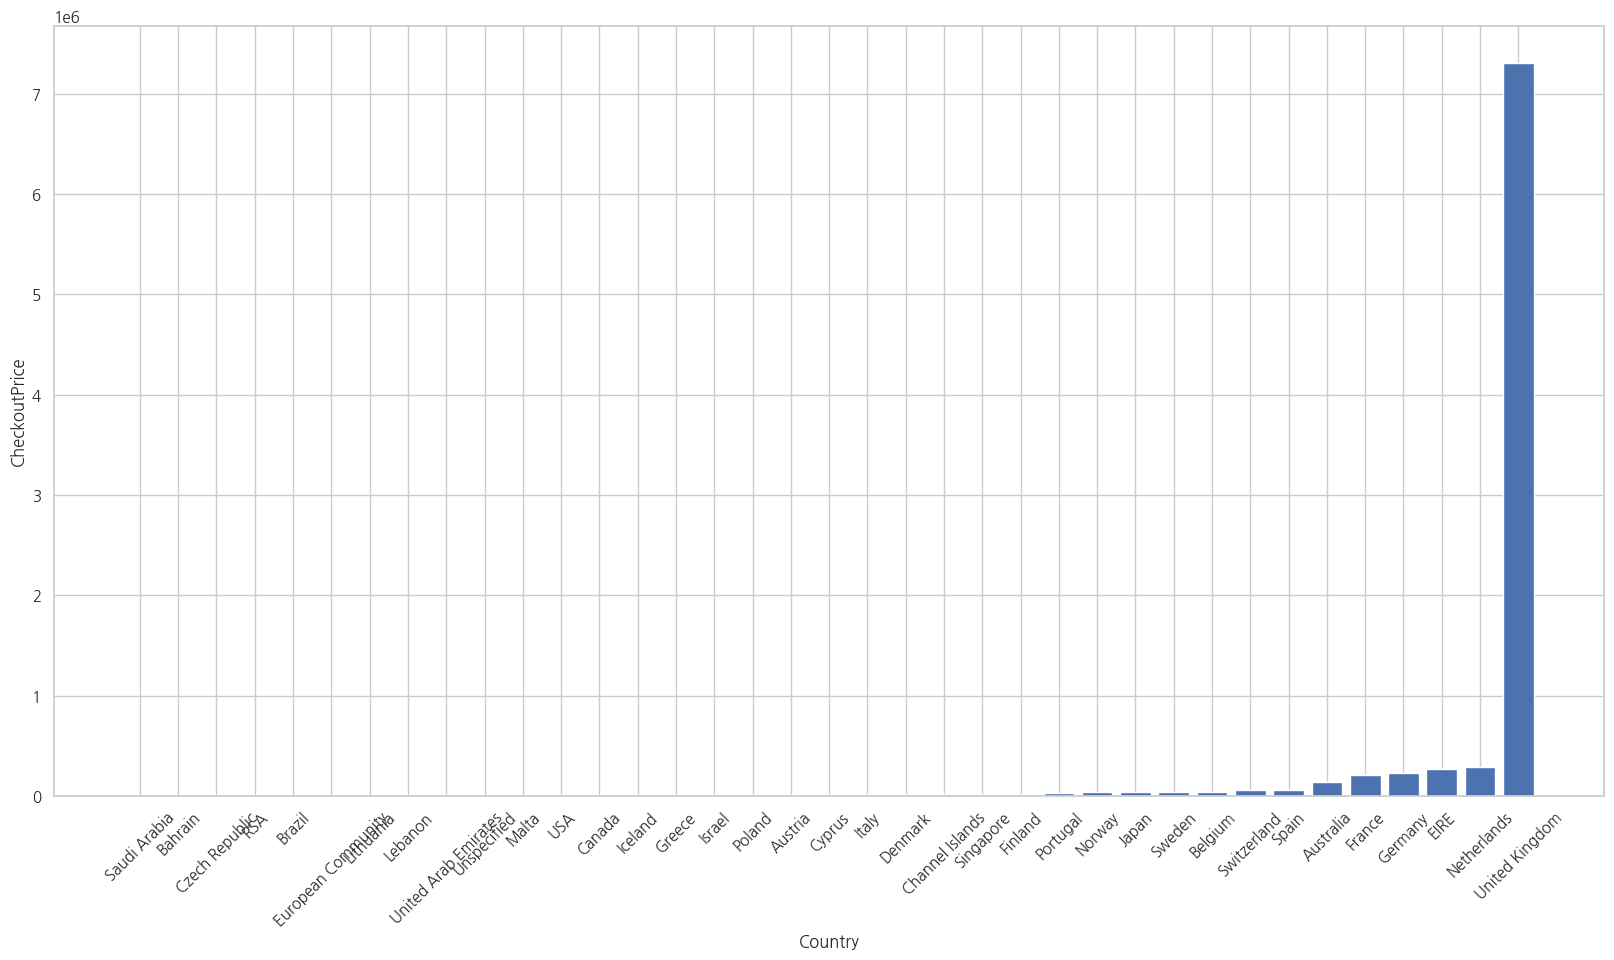

In [49]:
# matplot bar 차트

# plt.bar(x=rev_by_contries['Country'], height=rev_by_contries['CheckoutPrice'])

plt.figure(figsize=(20,10))
plt.bar(x='Country', height='CheckoutPrice', data=rev_by_contries)
plt.xlabel("Country")
plt.ylabel('CheckoutPrice')
g = plt.xticks(rotation=45)

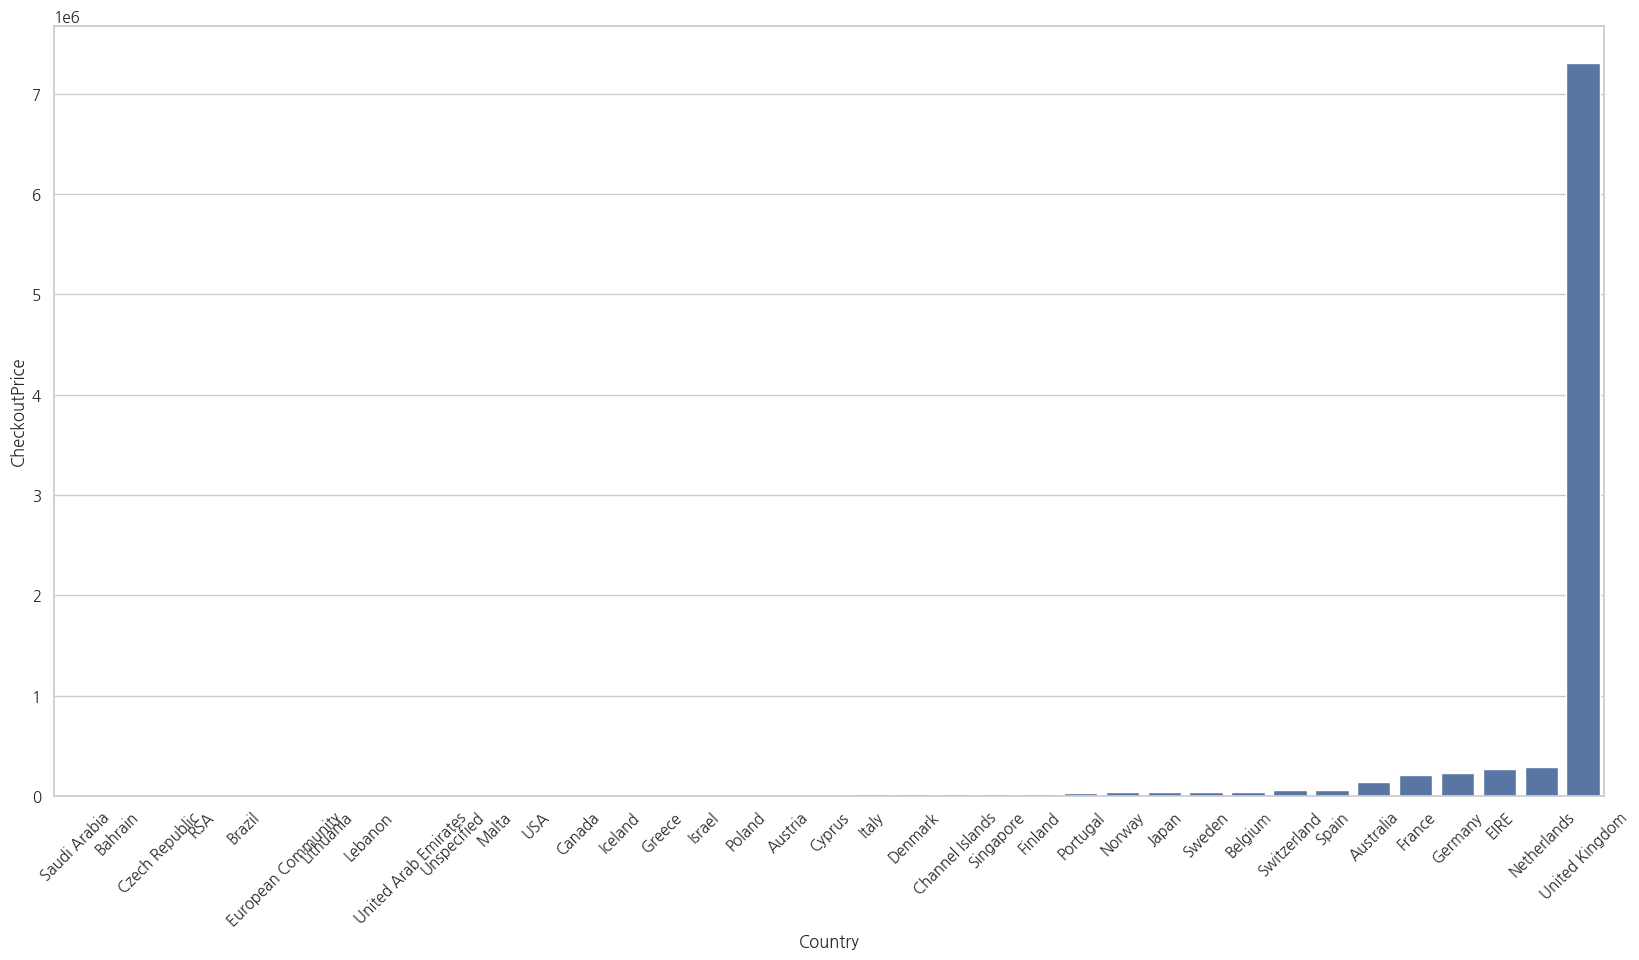

In [50]:
# seaborn

plt.figure(figsize=(20,10))
sns.barplot(x='Country', y='CheckoutPrice', data=rev_by_contries)
g = plt.xticks(rotation=45)

In [53]:
# 각 나라별 매출 비율

rev_by_contries['CheckoutPrice'] / total_revenue

0     0.000016
1     0.000062
2     0.000093
3     0.000112
4     0.000128
5     0.000146
6     0.000186
7     0.000190
8     0.000213
9     0.000299
10    0.000306
11    0.000402
12    0.000411
13    0.000484
14    0.000534
15    0.000810
16    0.000823
17    0.001144
18    0.001525
19    0.001962
20    0.002127
21    0.002295
22    0.002388
23    0.002530
24    0.003752
25    0.004058
26    0.004199
27    0.004307
28    0.004623
29    0.006334
30    0.006910
31    0.015544
32    0.023456
33    0.025682
34    0.029798
35    0.032032
36    0.820116
Name: CheckoutPrice, dtype: float64

In [56]:
# 월별 매출
retail_df.head(3)

# retail_df['InvoiceDate'].dt.month

# 월 분리 7 => 201007
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [60]:
rev_by_month = retail_df.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

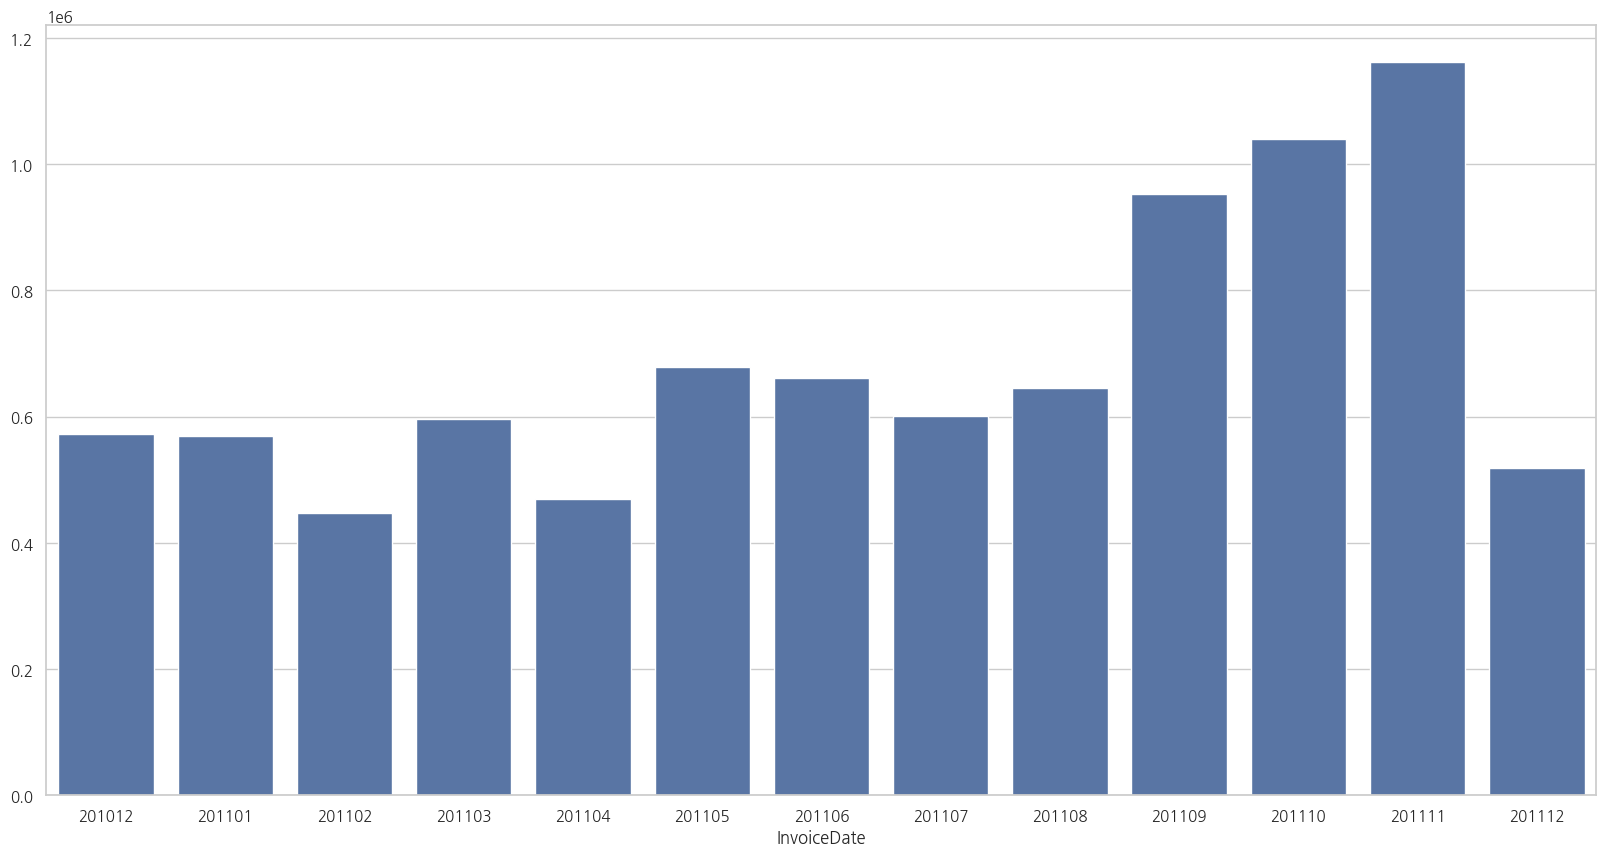

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x=rev_by_month.index, y=rev_by_month.values)
g = plt.xticks(rotation=0)

In [65]:
# 요일별 매출

# dayofweek : 날짜 => 숫자(요일) 0:월요일
rev_by_dow = retail_df.set_index('InvoiceDate').groupby(lambda date:date.dayofweek)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [71]:
DAY_OF_WEEK = np.array(['월','화','수','목','금','토','일'])
DAY_OF_WEEK

rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

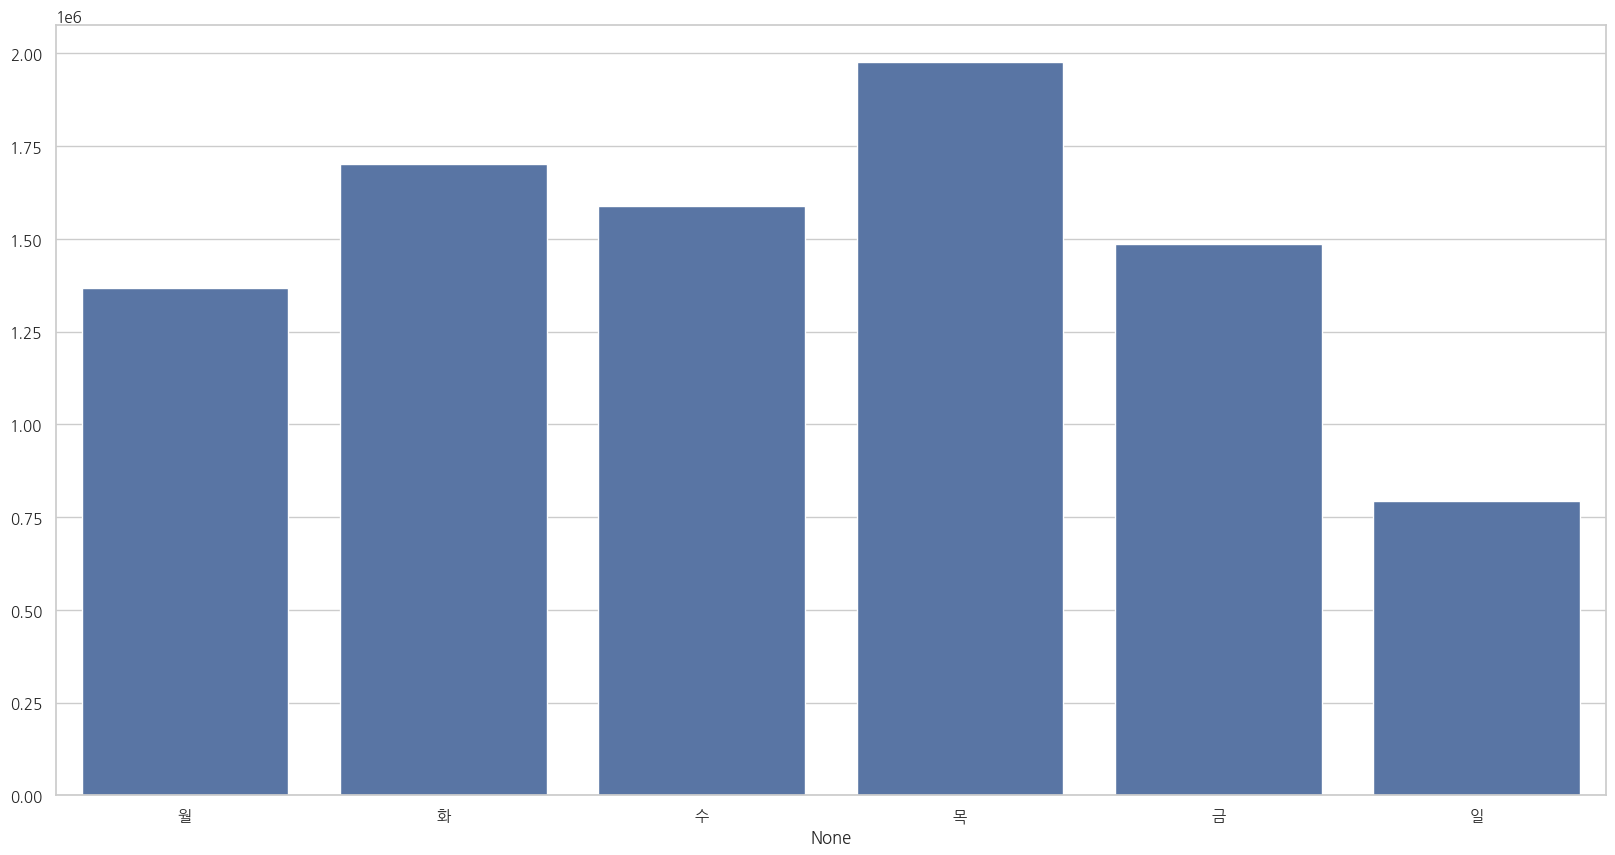

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x=rev_by_dow.index, y=rev_by_dow.values)
g = plt.xticks(rotation=0)

In [73]:
# 시간별 매출

rev_by_hour = retail_df.set_index('InvoiceDate').groupby(lambda date:date.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

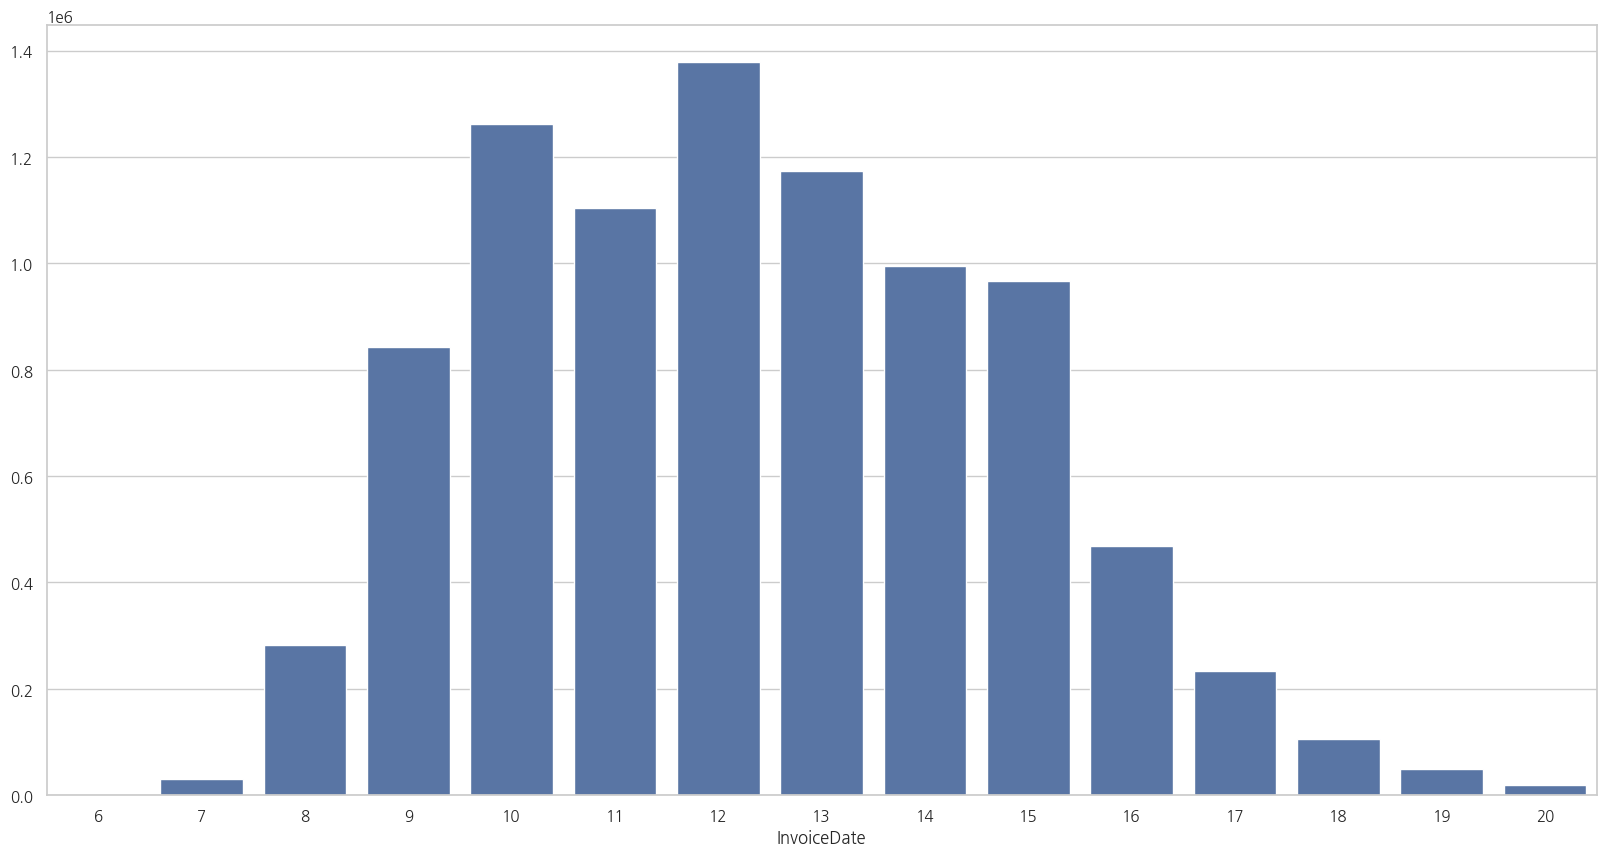

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x=rev_by_hour.index, y=rev_by_hour.values)
g = plt.xticks(rotation=0)

In [79]:
# 가장 많이 판매된 제품 TOP 10  (건수, 금액)

retail_df.head()

# StockCode 그룹, Quantity sum

retail_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10]

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [80]:
# StockCode 그룹, CheckoutPrice sum

retail_df.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False)[:10]

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

In [83]:
# top3 월별 판매량 추이

top3 = retail_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:3]
top3

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [86]:
top3 = retail_df.set_index('InvoiceDate').groupby(['StockCode',extract_month])[['Quantity','CheckoutPrice']].sum().loc[top3.index]
top3

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
23166     201101          74215       77183.60
          201105            792         869.04
          201106            391         458.51
          201107            718         826.94
          201108            405         486.09
          201109            342         397.26
          201110            235         283.67
          201111            631         708.11
          201112            187         203.51
84077     201012           5139        1150.47
          201101           1488         385.44
          201102           3457         795.17
          201103           3888         943.20
          201104          10224        2281.44
          201105           4944        1249.44
          201106           1920         533.76
          201107           3600         982.56
          201108           2256         654.24
          201109           3462         985.70
          201110           8174        1953.98
          201111           4500        1294.20
          201112           1363         376.65

In [89]:
# 우수고객 : 구매횟수, 구매금액

# CustomerID count 구매횟수

retail_df.groupby('CustomerID').size().sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
18184       1
18233       1
13099       1
18268       1
12346       1
Length: 4338, dtype: int64

In [91]:
# CustomerID CheckoutPrice sum 구매금액

retail_df.groupby('CustomerID')['CheckoutPrice'].sum().sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

In [92]:
# 사용자 재구매율 분석

# 구매일자 변경 : 2010-12-15 => 2010-12-01
# InvoiceData : 년도,월만 추출 
from datetime import datetime
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

In [93]:
# Month = 변경날짜

retail_df['Month'] = retail_df['InvoiceDate'].apply(get_month_as_datetime)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [96]:
# 한 사용자가 구매한 최초 월 구하기

retail_df['MonthStarted'] = retail_df.groupby('CustomerID')['Month'].transform(min)
retail_df.head()

C:\Users\soldesk\AppData\Local\Temp\ipykernel_2916\1970326202.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  retail_df['MonthStarted'] = retail_df.groupby('CustomerID')['Month'].transform(min)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01


In [101]:
retail_df['MonthPassed'] = (retail_df['Month'].dt.year - retail_df['MonthStarted'].dt.year) * 12 + (retail_df['Month'].dt.month - retail_df['MonthStarted'].dt.month)

In [104]:
# MonthPassed 값을 기준으로 고객 수 계산

cohort_df = retail_df.groupby(['MonthStarted','MonthPassed'])['CustomerID'].apply(lambda x:len(np.unique(x))).reset_index()

In [106]:

cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')
cohort_df.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [108]:
# heatmap

customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0) * 100
customer_cohort = customer_cohort.round(2)
customer_cohort

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

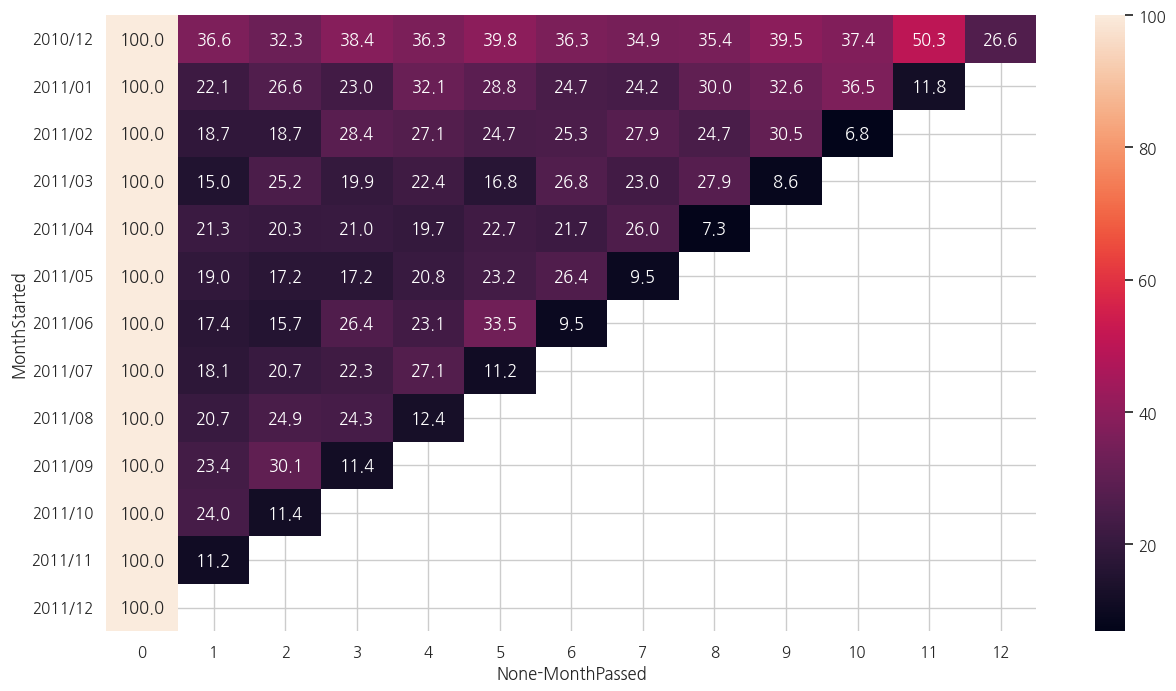

In [112]:
plt.figure(figsize=(15,8))
xticks = np.arange(0,13)
yticks = ['2010/12','2011/01','2011/02','2011/03','2011/04','2011/05','2011/06','2011/07','2011/08','2011/09','2011/10','2011/11','2011/12']

sns.heatmap(customer_cohort, fmt=".1f",annot=True, xticklabels=xticks, yticklabels=yticks);

In [113]:
# 쿠폰발송을 몇 시에 할 것인가?


order_by_hour = retail_df.set_index('InvoiceDate').groupby(lambda date:date.hour)['CheckoutPrice'].count()
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CheckoutPrice, dtype: int64

In [114]:
def half_an_hour(date):
    minute = ':00'
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)

    if date.hour < 10:
        hour = '0' + hour

    return hour + minute

In [115]:
order_by_hour_half = retail_df.set_index('InvoiceDate').groupby(half_an_hour)['CheckoutPrice'].count()
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CheckoutPrice, dtype: int64